In [1]:
import pandas as pd
import matplotlib.pyplot as plt 

In [2]:
df = pd.DataFrame({'Name':['ram','shyam','Mohan','maria','sakib','tao','virat','khusbu','dmitry','selena','john','imran','jose','deepika'],
                   'Height':[5.9,5.2,5.1,5.5,4.9,5.4,6.2,6.5,7.1,14.5,6.1,5.6,1.2,5.5]})
df.head()

,Name,Height
0,ram,5.9
1,shyam,5.2
2,Mohan,5.1
3,maria,5.5
4,sakib,4.9


## 1. Detecting outliers using percentile
Pandas dataframe.quantile() function return values at the given quantile.

In [3]:
max_threshold = df['Height'].quantile(0.95)
max_threshold

9.689999999999998

In [4]:
df[df.Height>max_threshold]

,Name,Height
9,selena,14.5


In [5]:
min_threshold = df.Height.quantile(0.05)
min_threshold

3.6050000000000004

In [6]:
df[df.Height<min_threshold]

,Name,Height
12,jose,1.2


In [7]:
df[(df['Height']<max_threshold) & (df['Height']>min_threshold)]

,Name,Height
0,ram,5.9
1,shyam,5.2
2,Mohan,5.1
3,maria,5.5
4,sakib,4.9
5,tao,5.4
6,virat,6.2
7,khusbu,6.5
8,dmitry,7.1
10,john,6.1


## 2. Outlier detection and removal using z-score and standard deviation in python pandas

In [8]:
path = r'D:\ML\ML from Basics\Datasets\heights.csv'
df=pd.read_csv(path)
df.head()

,gender,height
0,Male,73.847017
1,Male,68.781904
2,Male,74.110105
3,Male,71.730978
4,Male,69.881796


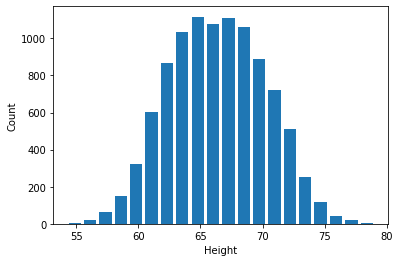

In [9]:
plt.hist(df['height'],rwidth=0.8,bins=20)
plt.xlabel('Height')
plt.ylabel('Count')
plt.show()

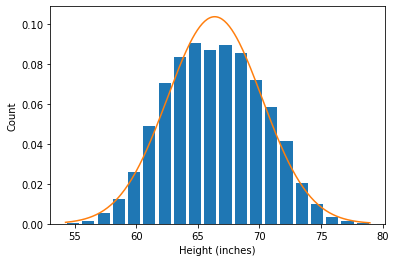

In [10]:
from scipy.stats import norm
import numpy as np
plt.hist(df.height, bins=20, rwidth=0.8, density=True)
plt.xlabel('Height (inches)')
plt.ylabel('Count')

rng = np.arange(df.height.min(), df.height.max(), 0.1)
plt.plot(rng, norm.pdf(rng,df.height.mean(),df.height.std()))
plt.show()

In [11]:
df.height.mean()

66.367559754866

In [12]:
df.height.std()

3.847528120795573

### 2.1 Outlier detection and removal using 3 standard deviation

One of the ways we can remove outliers is remove any data points that are beyond 3 standard deviation from mean. Which means we can come up with following upper and lower bounds

In [13]:
upper_limit = df.height.mean() + 3*df.height.std()
upper_limit

77.91014411725271

In [14]:
lower_limit = df.height.mean() - 3*df.height.std()
lower_limit

54.824975392479274

In [15]:
df[(df.height>upper_limit) | (df.height<lower_limit)]

,gender,height
994,Male,78.095867
1317,Male,78.462053
2014,Male,78.998742
3285,Male,78.528210
3757,Male,78.621374
6624,Female,54.616858
9285,Female,54.263133


In [16]:
df_no_outlier_std_dev = df[(df.height<upper_limit) & (df.height>lower_limit)]
df_no_outlier_std_dev.head()

,gender,height
0,Male,73.847017
1,Male,68.781904
2,Male,74.110105
3,Male,71.730978
4,Male,69.881796


### 2.2 Outlier detection and removal using Z Score

Z score indicates how many standard deviation away a data point is.

For example in our case mean is 66.37 and standard deviation is 3.84.

If a value of a data point is 77.91 then Z score for that is 3 because it is 3 standard deviation away (77.91 = 66.37 + 3 * 3.84)

<b>Calculate the Z Score</b>
<img src='https://raw.githubusercontent.com/codebasics/py/21a0f1001e03c9c58b96009fba738001c8422d3f/ML/FeatureEngineering/2_outliers_z_score/zscore.png' width='200'>

In [17]:
df['zscore']= (df['height']-df.height.mean())/df.height.std()

In [18]:
df.sample(10)

,gender,height,zscore
5071,Female,64.089406,-0.592108
5573,Female,64.495490,-0.486564
2441,Male,70.710938,1.128875
961,Male,70.046931,0.956295
5115,Female,62.996579,-0.876142
3508,Male,66.067548,-0.077975
2432,Male,73.513595,1.857306
4650,Male,73.631336,1.887907
9637,Female,62.632250,-0.970834
1648,Male,67.473099,0.287337


In [19]:
df[(df['zscore']>3) | (df['zscore']<-3)]

,gender,height,zscore
994,Male,78.095867,3.048271
1317,Male,78.462053,3.143445
2014,Male,78.998742,3.282934
3285,Male,78.528210,3.160640
3757,Male,78.621374,3.184854
6624,Female,54.616858,-3.054091
9285,Female,54.263133,-3.146027


In [20]:
df_no_outliers = df[(df.zscore>-3) & (df.zscore<3)]
df_no_outliers.head()

,gender,height,zscore
0,Male,73.847017,1.943964
1,Male,68.781904,0.627505
2,Male,74.110105,2.012343
3,Male,71.730978,1.393991
4,Male,69.881796,0.913375
